# Frequency Domain Data Set

In [26]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from geobipy import FdemData
import numpy as np
from os.path import join

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Let's read in a frequency domain data set

In [27]:
FD1 = FdemData()
dataFname=join('supplementary','Data','Resolve2.txt')
systemFname=join('supplementary','Data','FdemSystem2.stm')
FD1.read(dataFname, systemFname)

In [28]:
FD1.channelNames

['In-Phase 380.0 (Hz)',
 'In-Phase 1776.0 (Hz)',
 'In-Phase 3345.0 (Hz)',
 'In-Phase 8171.0 (Hz)',
 'In-Phase 41020.0 (Hz)',
 'In-Phase 129550.0 (Hz)',
 'Quadrature 380.0 (Hz)',
 'Quadrature 1776.0 (Hz)',
 'Quadrature 3345.0 (Hz)',
 'Quadrature 8171.0 (Hz)',
 'Quadrature 41020.0 (Hz)',
 'Quadrature 129550.0 (Hz)']

In [29]:
FD1.getDataPoint(0)

### Print out a small summary of the data

In [30]:
FD1.summary()

3D Point Cloud: 
Number of Points: : 71470 
 Name:  Easting
    Units: m
    Shape: (71470,)
   Values: [586852.29 586852.23 586852.17 ... 590160.46 590163.5  590166.53]
No attached prior 
No attached proposal 
 Name:  Northing
    Units: m
    Shape: (71470,)
   Values: [4639119.38 4639122.68 4639125.98 ... 4640082.67 4640082.8  4640082.93]
No attached prior 
No attached proposal 
 Name:  Height
    Units: m
    Shape: (71470,)
   Values: [36.629 37.012 37.349 ... 33.123 33.021 32.917]
No attached prior 
No attached proposal 
Data:          : 
# of Channels: 12 
# of Total Data: 857640 



<IPython.core.display.Javascript object>


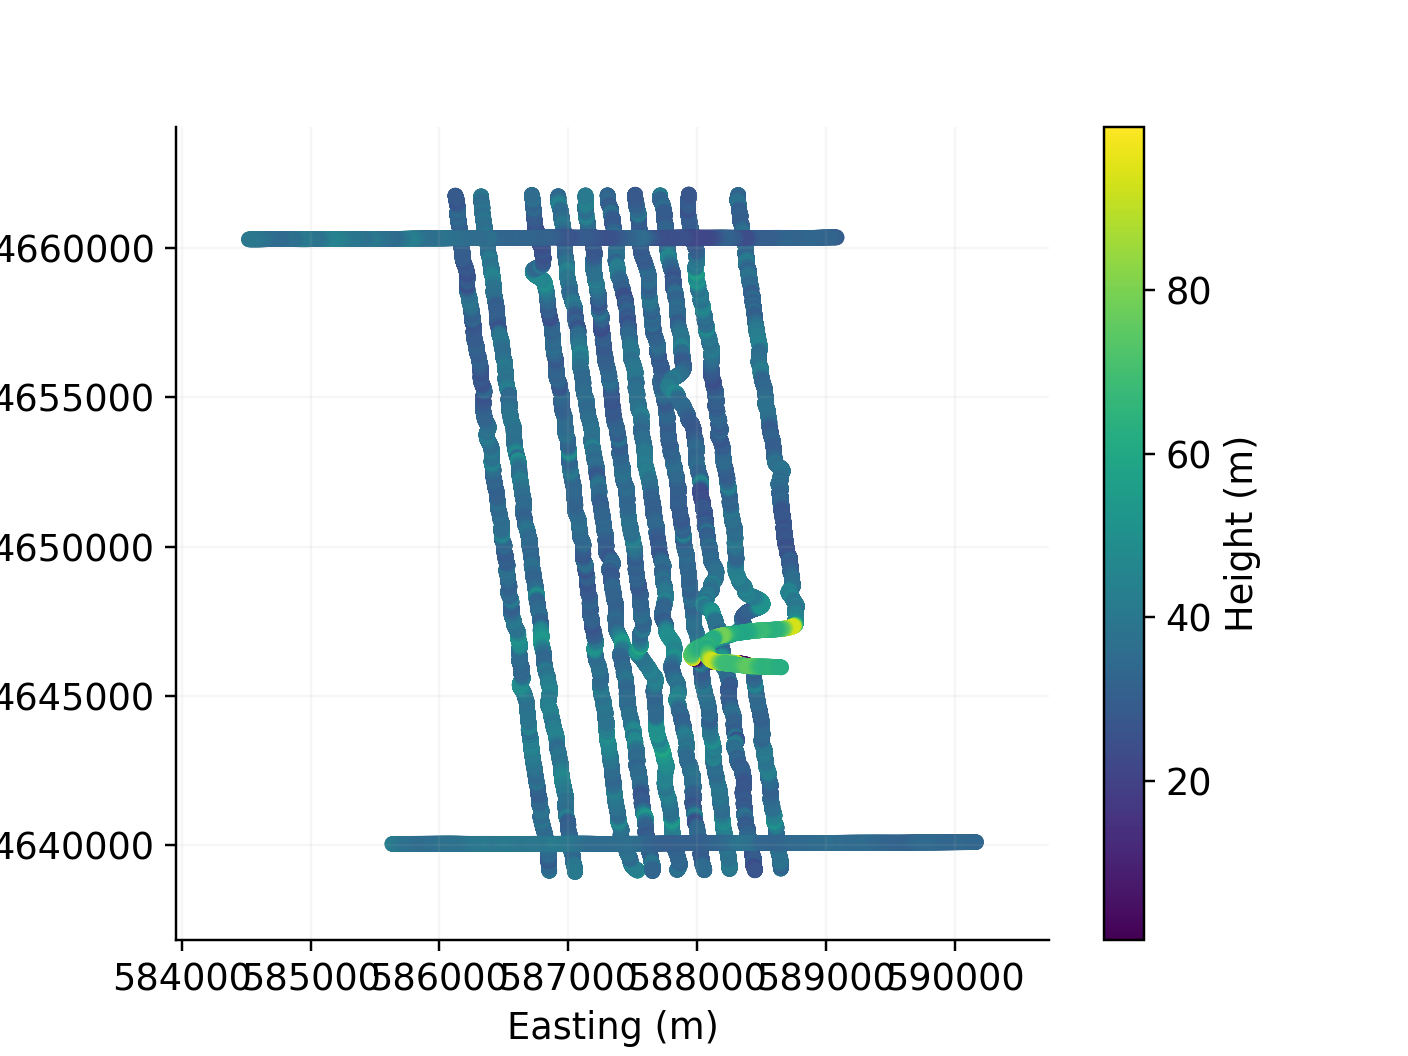

In [31]:
plt.figure()
FD1.scatter2D()

### Plot all the data along the specified line

<IPython.core.display.Javascript object>


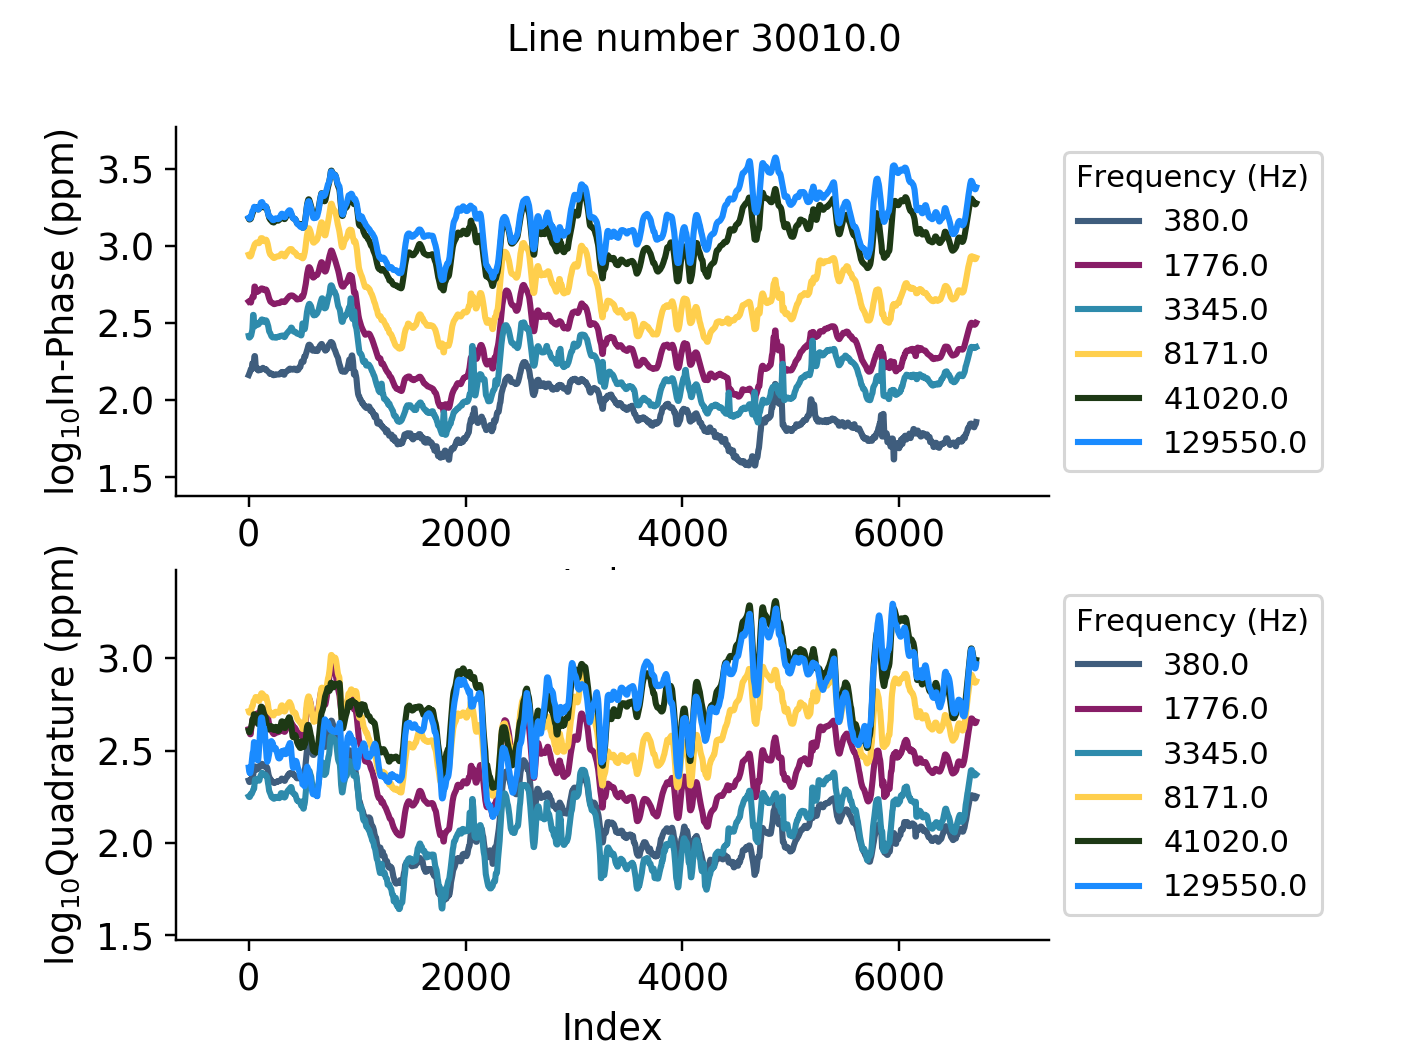

In [32]:
plt.figure()
ax = FD1.plotLine(30010.0, log=10)

### Or, plot specific channels in the data

<IPython.core.display.Javascript object>


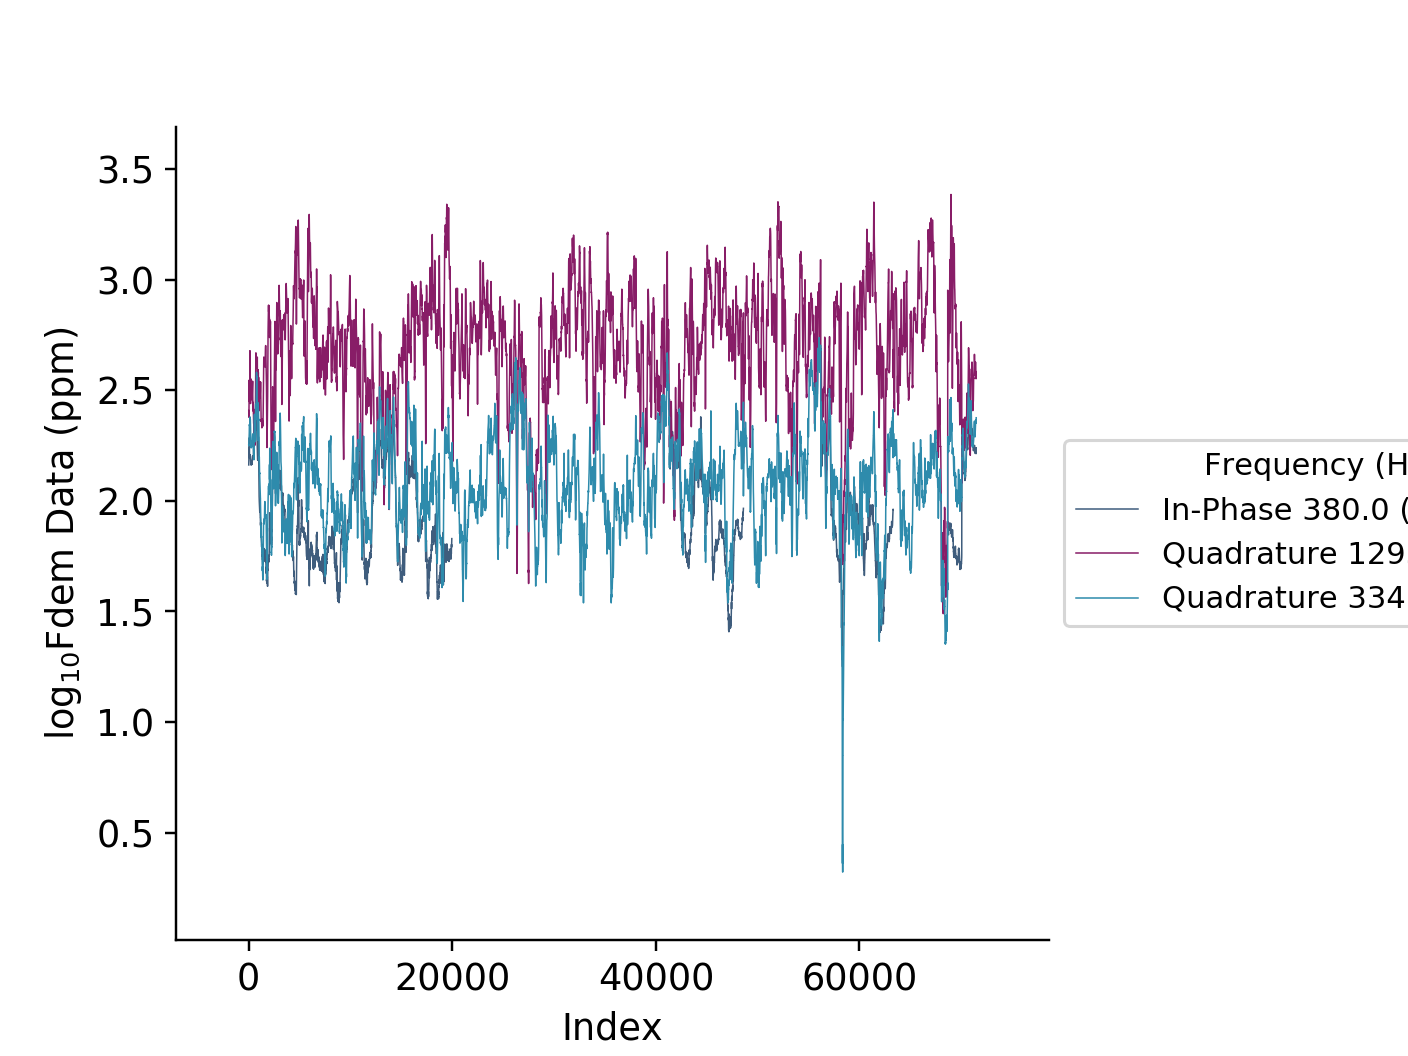

In [33]:
plt.figure()
FD1.plot(channels=[0,11,8], log=10, linewidth=0.5);

# Read in a second data set

In [34]:
FD2 = FdemData()
FD2.read(dataFilename=join('supplementary','Data','Resolve1.txt'), systemFilename=join('supplementary','Data','FdemSystem1.stm'))

### We can create maps of the elevations in two separate figures

<IPython.core.display.Javascript object>


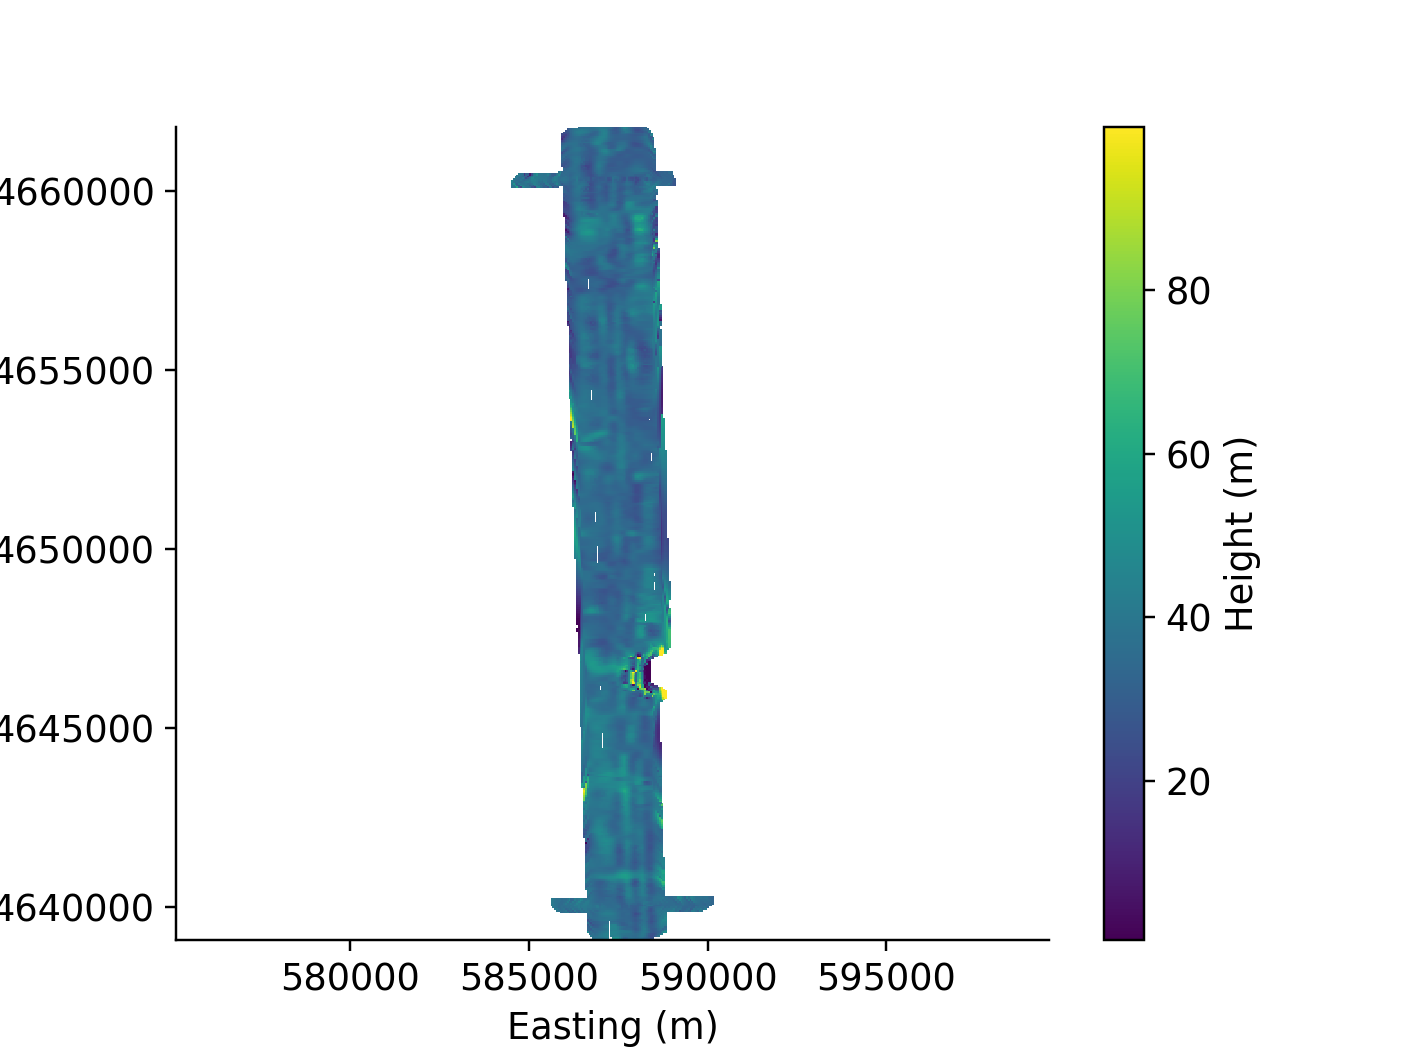

<IPython.core.display.Javascript object>


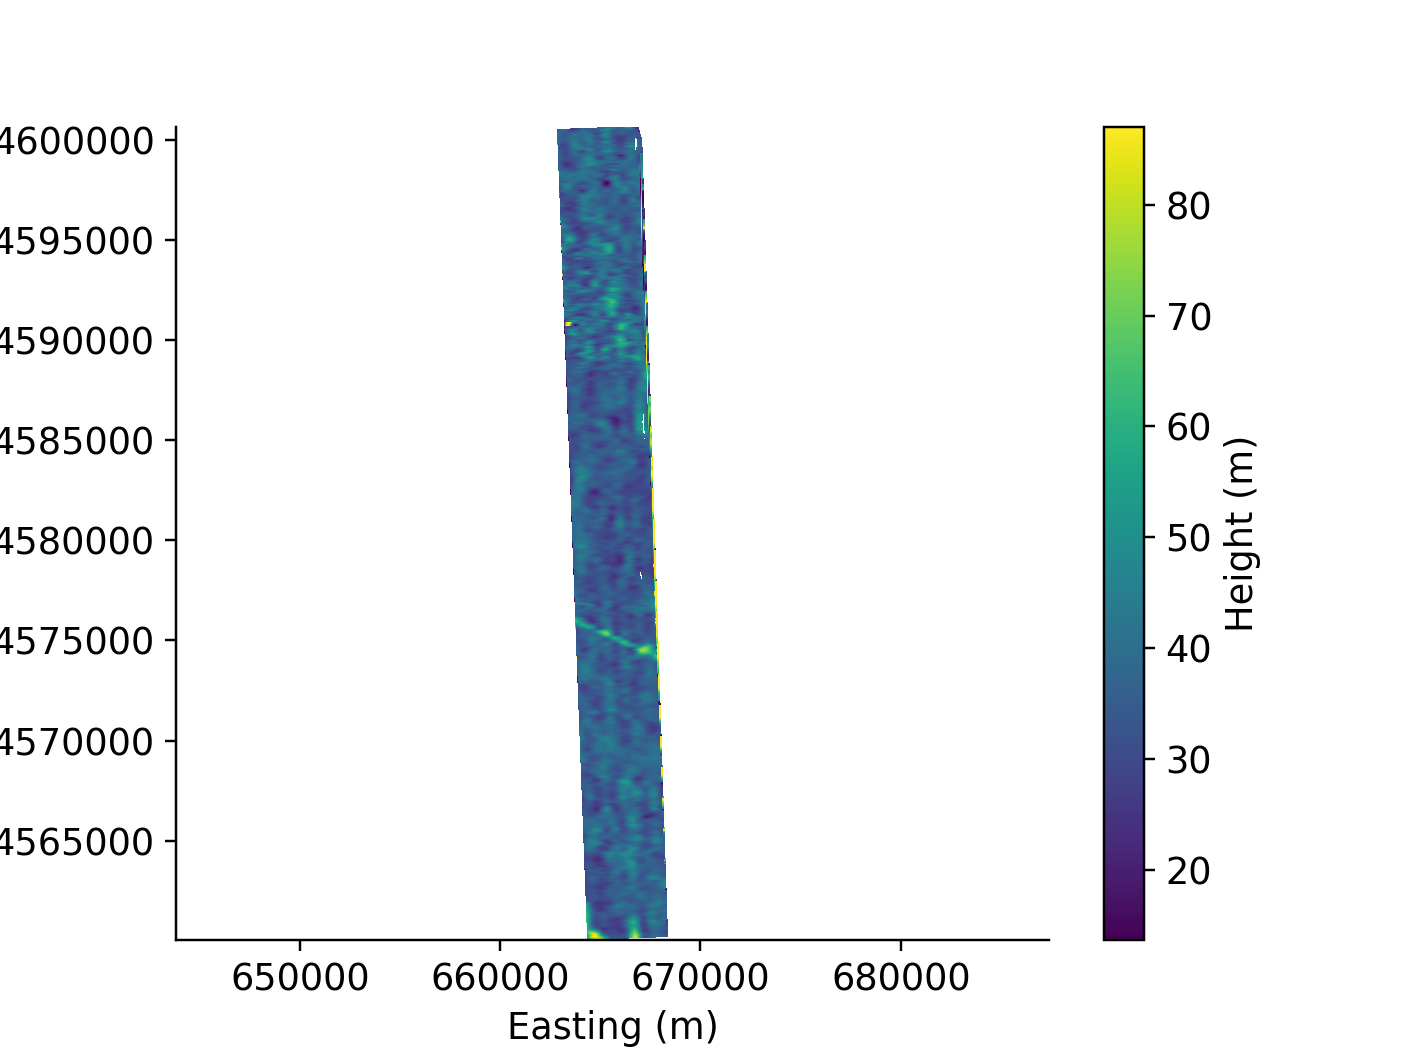

In [35]:
plt.figure()
FD1.mapPlot(dx=50.0, dy=50.0, mask = 200.0, method='ct');plt.axis('equal')

plt.figure()
FD2.mapPlot(dx=50.0, dy=50.0, mask = 200.0, method = 'ct');plt.axis('equal');

### Or, we can plot both data sets in one figure to see their positions relative to each other.
#### In this case, I use a 2D scatter plot of the data point co-ordinates, and pass one of the channels as the colour.

<IPython.core.display.Javascript object>


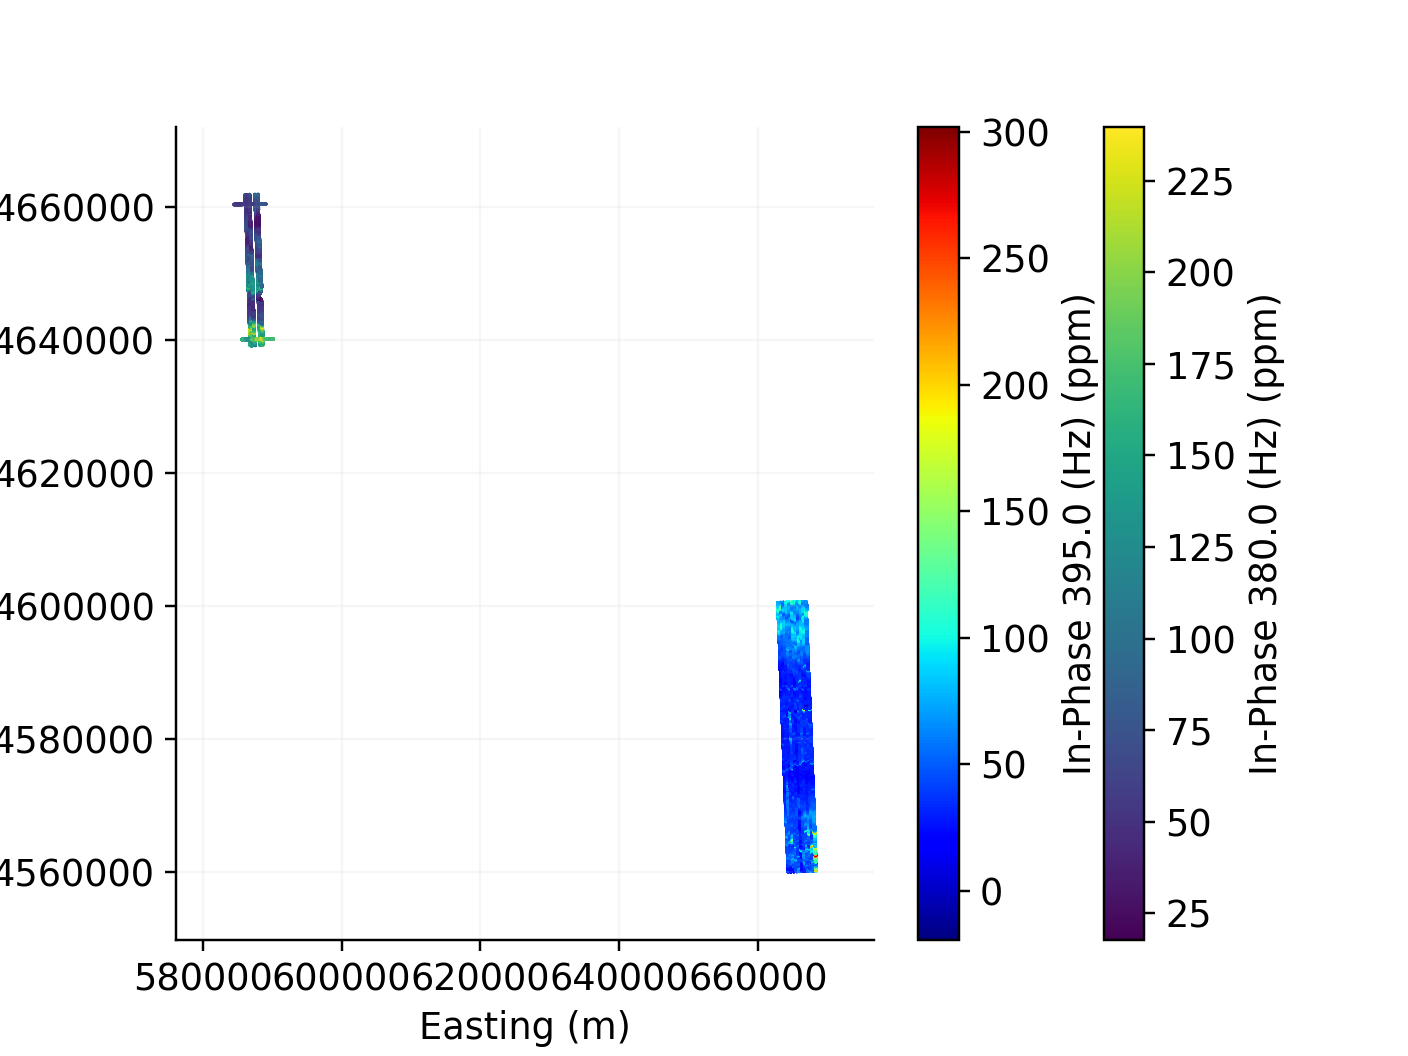

In [36]:
plt.figure()
FD1.scatter2D(s=1.0, c=FD1.getDataChannel(0))
FD2.scatter2D(s=1.0, c=FD2.getDataChannel(0), cmap='jet');

### Or, I can interpolate the values to create a gridded "map". mapChannel will interpolate the specified channel number.

<IPython.core.display.Javascript object>


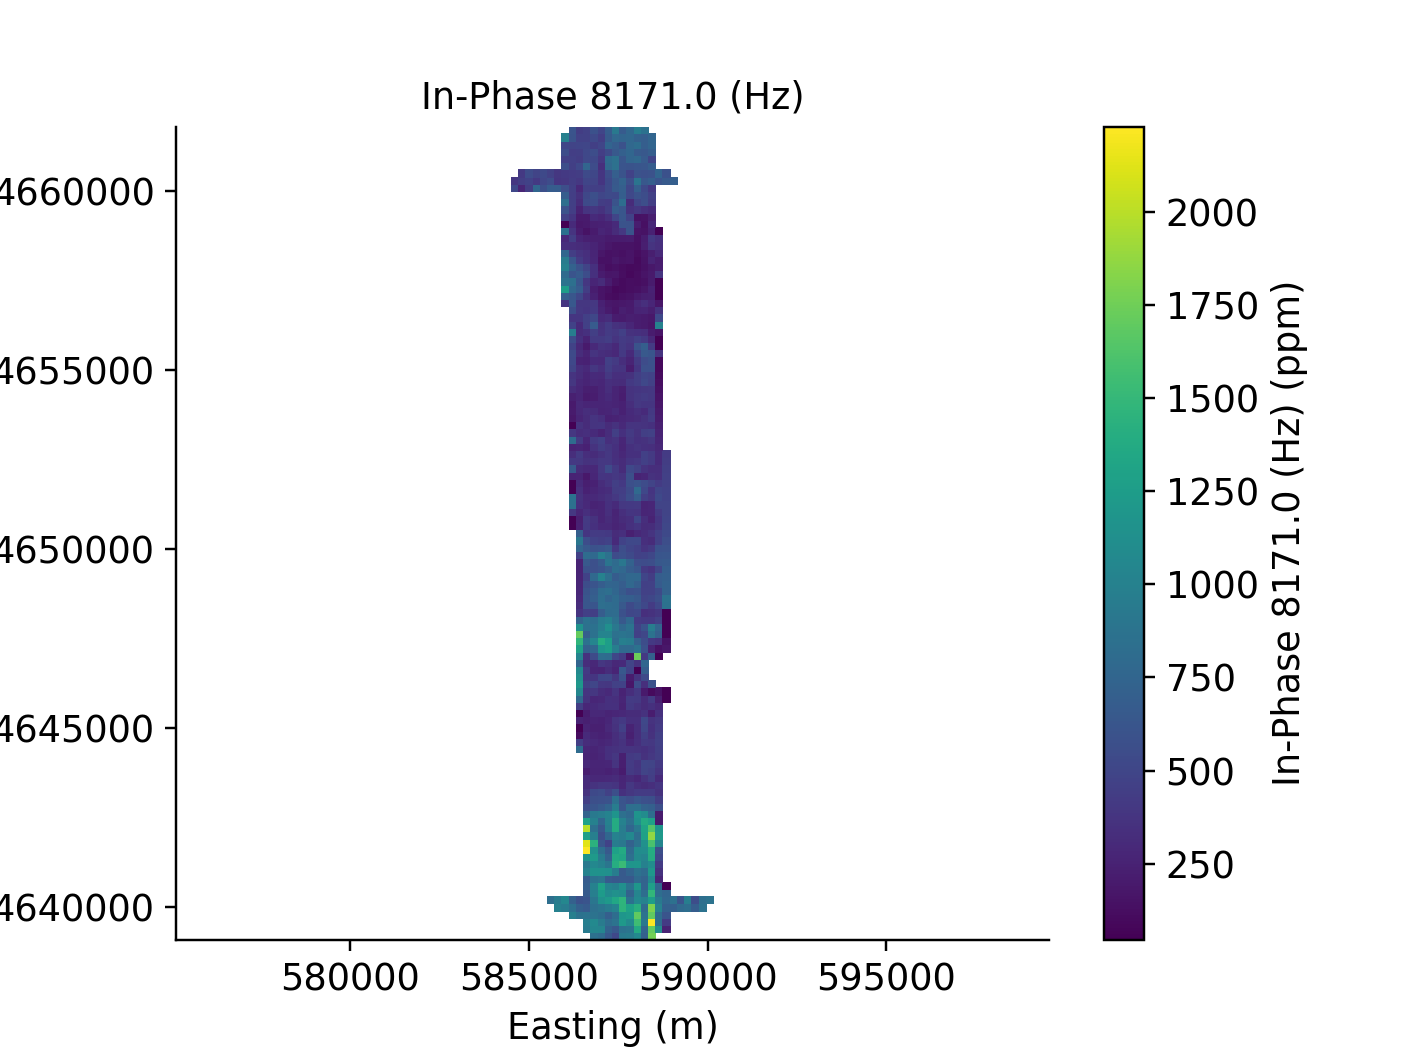

In [37]:
plt.figure()
FD1.mapData(3, system=0, method='ct', dx=200, dy=200, mask=250)
plt.axis('equal');

### Export the data to VTK

In [38]:
FD1.toVTK('FD_one')
FD2.toVTK('FD_two')

## We can get a specific line from the data set

In [39]:
print(np.unique(FD1.line))

[30010. 30020. 30030. ... 30100. 39010. 39020.]


In [40]:
L = FD1.getLine(30010.0)

### A summary will now show the properties of the line.

In [41]:
L.summary()

3D Point Cloud: 
Number of Points: : 6710 
 Name:  Easting
    Units: m
    Shape: (6710,)
   Values: [586852.29 586852.23 586852.17 ... 586123.57 586123.2  586122.82]
No attached prior 
No attached proposal 
 Name:  Northing
    Units: m
    Shape: (6710,)
   Values: [4639119.38 4639122.68 4639125.98 ... 4661765.26 4661768.84 4661772.42]
No attached prior 
No attached proposal 
 Name:  Height
    Units: m
    Shape: (6710,)
   Values: [36.629 37.012 37.349 ... 28.313 28.218 28.115]
No attached prior 
No attached proposal 
Data:          : 
# of Channels: 12 
# of Total Data: 80520 



### And we can scatter2D the points in the line.

<IPython.core.display.Javascript object>


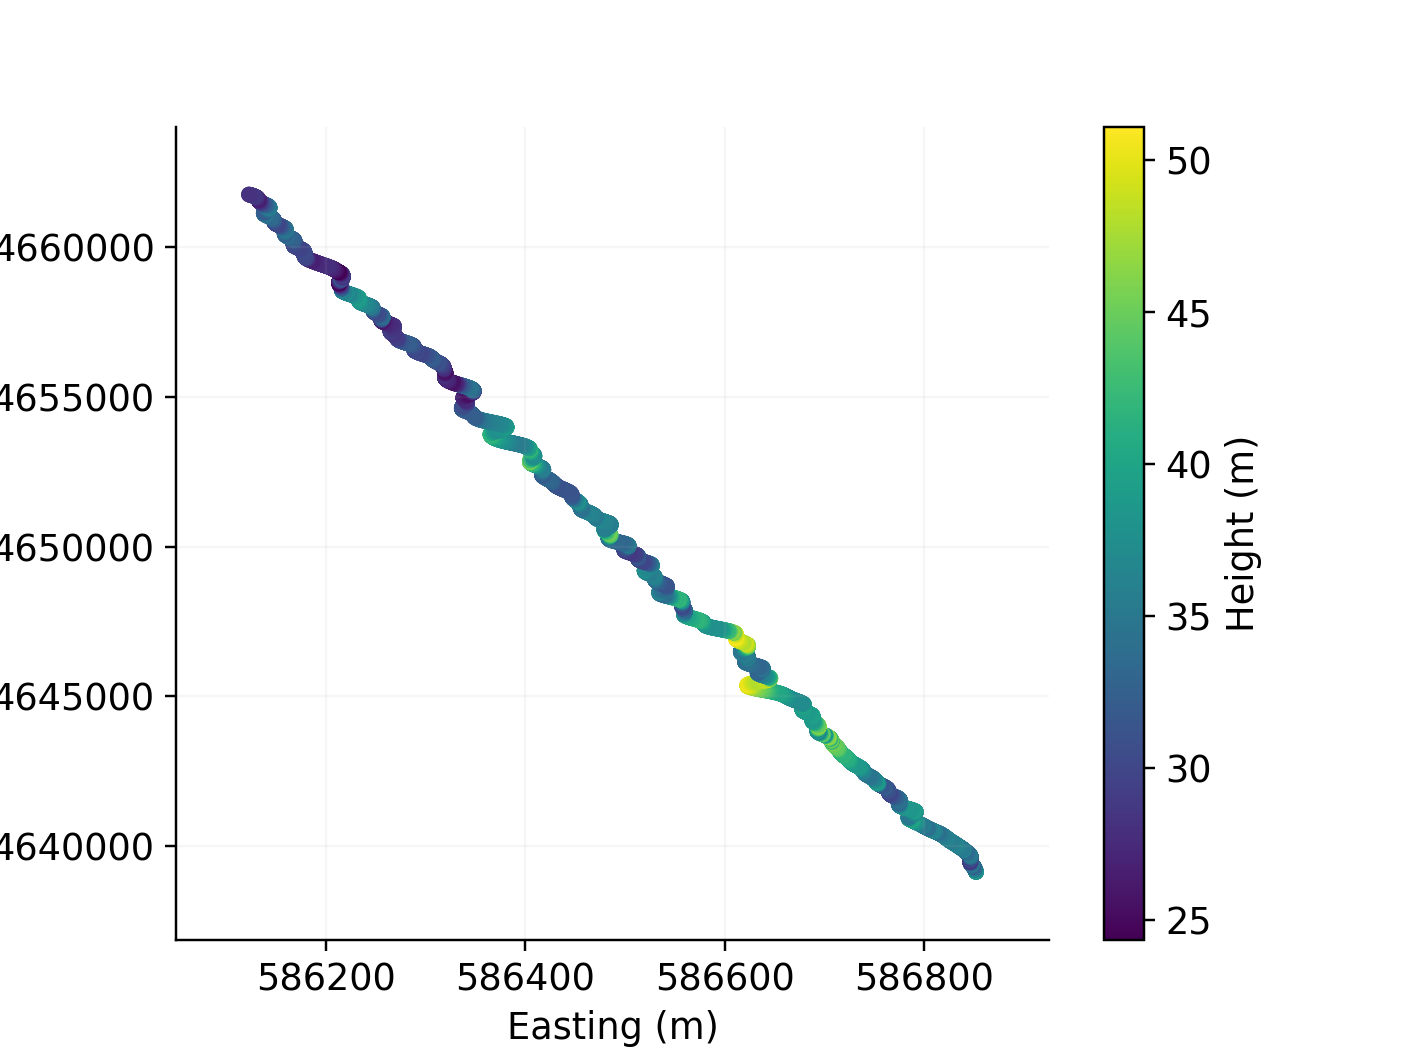

In [42]:
plt.figure()
L.scatter2D()

<IPython.core.display.Javascript object>


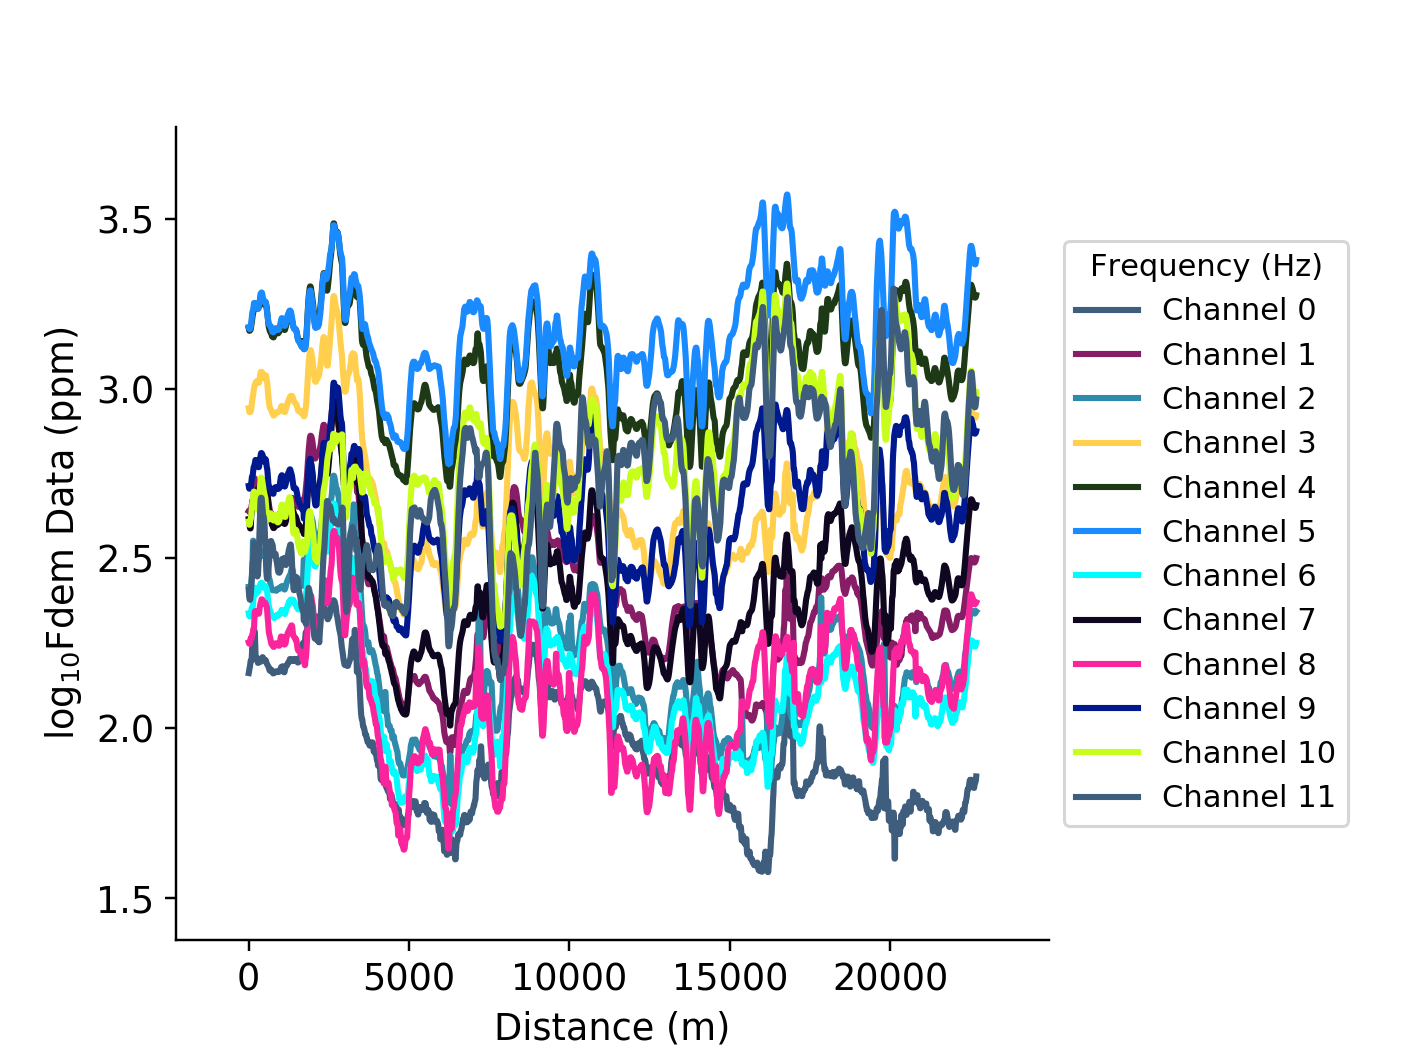

(<matplotlib.axes._subplots.AxesSubplot at 0x1a26587b00>,
 <matplotlib.legend.Legend at 0x1a212c9320>)

In [43]:
plt.figure()
L.plot(xAxis='r2d', log=10)